In [1]:
# Required Libraries
import pyforest as py

import warnings
warnings.filterwarnings("ignore")

In [2]:
# pip install fastparquet
# pip install pyforest

In [3]:
# Reading the parquet file
data = pd.read_parquet('green_tripdata_2016-12.parquet', engine='fastparquet')

# Top 5 records
data.head()

<IPython.core.display.Javascript object>

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2016-12-01 00:13:25,2016-12-01 00:25:41,N,1,225,65,1,2.79,11.0,0.5,0.5,0.00,0.0,<NA>,0.3,12.30,2,1,<NA>
1,2,2016-12-01 00:06:47,2016-12-01 00:08:52,N,1,255,255,1,0.45,3.5,0.5,0.5,0.96,0.0,<NA>,0.3,5.76,1,1,<NA>
2,1,2016-12-01 00:29:45,2016-12-01 00:34:21,N,1,41,42,1,1.20,6.0,0.5,0.5,0.00,0.0,<NA>,0.3,7.30,3,1,<NA>
3,1,2016-12-01 00:05:43,2016-12-01 00:11:56,N,1,80,255,1,1.40,6.5,0.5,0.5,0.00,0.0,<NA>,0.3,7.80,2,1,<NA>
4,1,2016-12-01 00:47:13,2016-12-01 01:02:59,N,1,255,189,1,3.50,13.5,0.5,0.5,3.70,0.0,<NA>,0.3,18.50,1,1,<NA>


In [4]:
data.shape

(1224158, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224158 entries, 0 to 1224157
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1224158 non-null  int64         
 1   lpep_pickup_datetime   1224158 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  1224158 non-null  datetime64[ns]
 3   store_and_fwd_flag     1224158 non-null  object        
 4   RatecodeID             1224158 non-null  int64         
 5   PULocationID           1224158 non-null  int64         
 6   DOLocationID           1224158 non-null  int64         
 7   passenger_count        1224158 non-null  int64         
 8   trip_distance          1224158 non-null  float64       
 9   fare_amount            1224158 non-null  float64       
 10  extra                  1224158 non-null  float64       
 11  mta_tax                1224158 non-null  float64       
 12  tip_amount             12241

In [6]:
# Data charracterization
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,0,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,0
mean,1.799278e+00,1.085079e+00,1.131729e+02,1.290862e+02,1.362447e+00,2.618179e+00,1.159368e+01,3.629562e-01,4.872578e-01,1.128787e+00,9.456725e-02,<NA>,2.925184e-01,1.399902e+01,1.534862e+00,1.019722e+00,<NA>
std,4.005404e-01,5.660195e-01,7.628387e+01,7.723367e+01,1.036924e+00,2.806160e+00,9.793499e+00,3.901575e-01,8.517500e-02,2.216306e+00,8.808537e-01,<NA>,5.072935e-02,1.112872e+01,5.240995e-01,1.390438e-01,<NA>
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.990000e+02,-4.500000e+00,-5.000000e-01,-1.056000e+01,-8.540000e+00,<NA>,-3.000000e-01,-4.990000e+02,1.000000e+00,1.000000e+00,<NA>
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,9.800000e-01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,<NA>,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00,<NA>
50%,2.000000e+00,1.000000e+00,8.300000e+01,1.290000e+02,1.000000e+00,1.700000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,<NA>,3.000000e-01,1.080000e+01,2.000000e+00,1.000000e+00,<NA>
75%,2.000000e+00,1.000000e+00,1.730000e+02,1.930000e+02,1.000000e+00,3.200000e+00,1.400000e+01,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,<NA>,3.000000e-01,1.656000e+01,2.000000e+00,1.000000e+00,<NA>
max,2.000000e+00,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,1.475000e+02,1.007000e+03,4.500000e+00,5.000000e-01,2.507000e+02,2.979800e+02,<NA>,3.000000e-01,1.008300e+03,5.000000e+00,2.000000e+00,<NA>


In [7]:
data.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1224158
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      0
congestion_surcharge     1224158
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

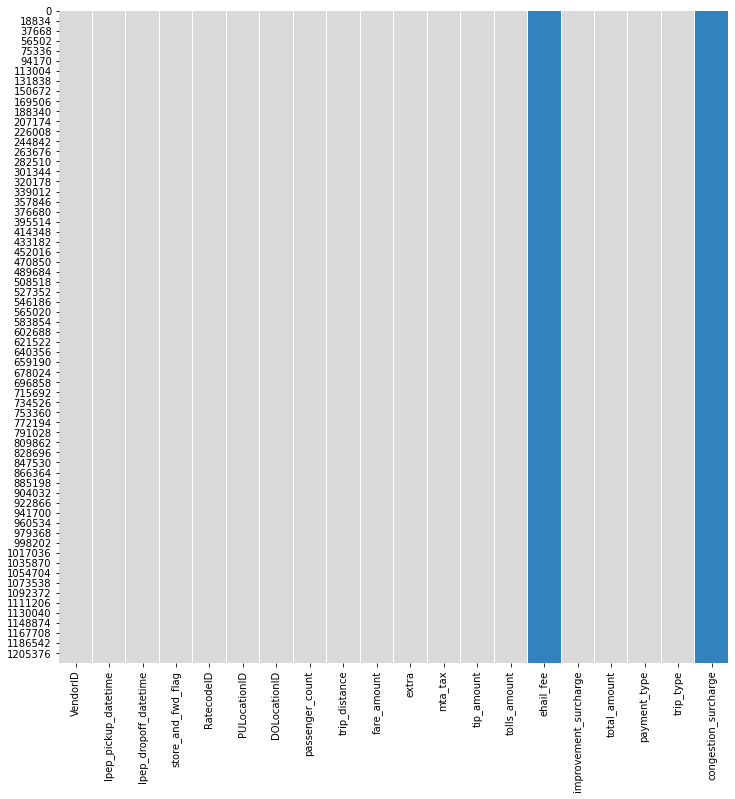

In [8]:
# Plot for the NULL values
plt.figure(figsize = (12,12))
sns.heatmap(data.isnull(), cbar=False, cmap = 'tab20c_r');

In [9]:
# It can be seen that the ehail_fee and the congestion_surcharge are completely null
    # Hence droping these 2 columns
data.drop(columns = ['ehail_fee','congestion_surcharge'],inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224158 entries, 0 to 1224157
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1224158 non-null  int64         
 1   lpep_pickup_datetime   1224158 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  1224158 non-null  datetime64[ns]
 3   store_and_fwd_flag     1224158 non-null  object        
 4   RatecodeID             1224158 non-null  int64         
 5   PULocationID           1224158 non-null  int64         
 6   DOLocationID           1224158 non-null  int64         
 7   passenger_count        1224158 non-null  int64         
 8   trip_distance          1224158 non-null  float64       
 9   fare_amount            1224158 non-null  float64       
 10  extra                  1224158 non-null  float64       
 11  mta_tax                1224158 non-null  float64       
 12  tip_amount             12241

In [11]:
# Checking Duplicate records

data.duplicated().sum()

# There are no duplicate record found in the data

0

In [12]:
# To get only the numerical columns
numCol = ['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount',
          'improvement_surcharge','total_amount']

In [13]:
# To get the categorical columns
catCol = ['store_and_fwd_flag','VendorID','RatecodeID', 'PULocationID', 'DOLocationID','payment_type', 'trip_type']

In [14]:
#sns.pairplot(data);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

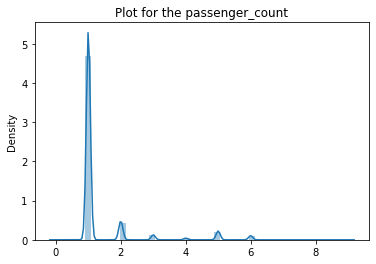

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

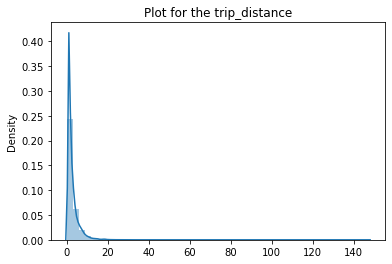

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

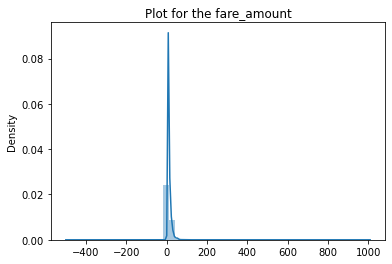

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

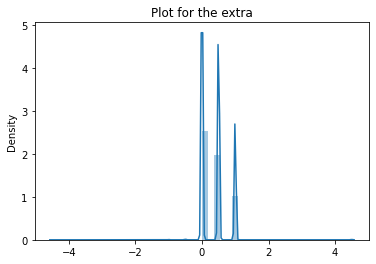

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

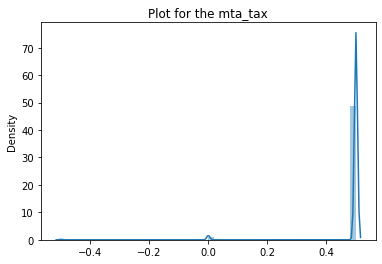

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

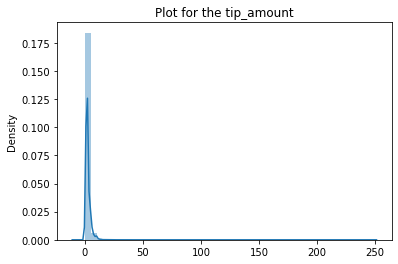

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

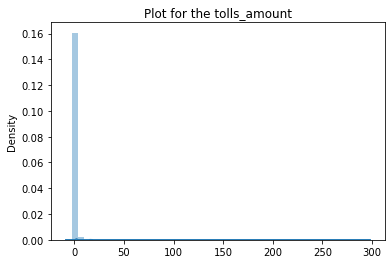

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

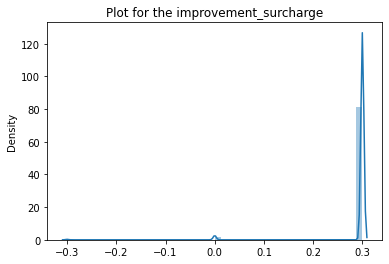

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

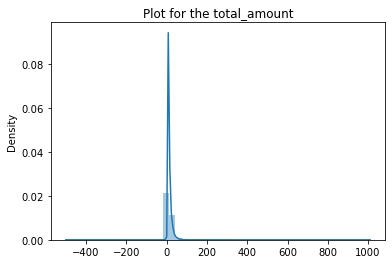

In [15]:
# Ploting the data for the data characterization 
for i in numCol:
    sns.distplot(x = data[i], kde =True);
    plt.title('Plot for the '+i);
    plt.show();

In [16]:
# Data characterization for the categorical columns
for i in catCol:
    print('Feature Name      '+str(i))
    print('___________________________________')
    print(data[i].value_counts())
    print('\n')

Feature Name      store_and_fwd_flag
___________________________________
N    1222074
Y       2084
Name: store_and_fwd_flag, dtype: int64


Feature Name      VendorID
___________________________________
2    978443
1    245715
Name: VendorID, dtype: int64


Feature Name      RatecodeID
___________________________________
1    1195018
5      24212
2       3303
3        914
4        692
6         19
Name: RatecodeID, dtype: int64


Feature Name      PULocationID
___________________________________
74     71318
41     69418
7      62206
75     61934
82     57920
       ...  
44         1
90         1
50         1
209        1
27         1
Name: PULocationID, Length: 241, dtype: int64


Feature Name      DOLocationID
___________________________________
42     41063
74     40768
7      38183
41     37141
129    37040
       ...  
204        5
176        5
44         4
99         1
110        1
Name: DOLocationID, Length: 260, dtype: int64


Feature Name      payment_type
___________________

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

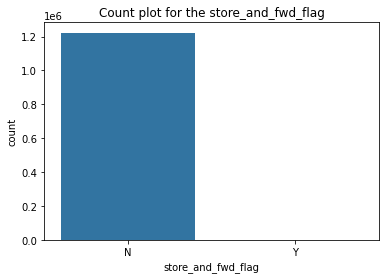

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

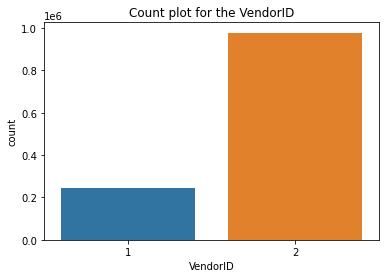

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

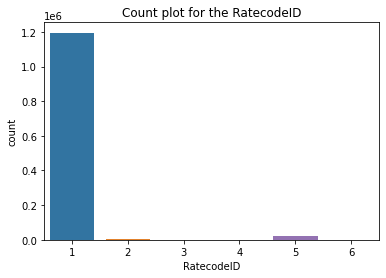

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

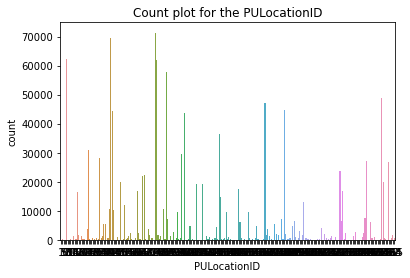

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

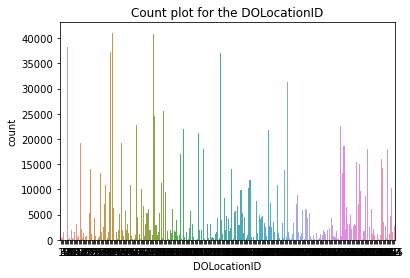

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

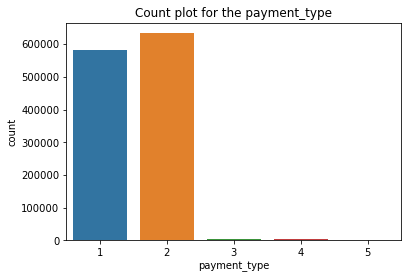

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

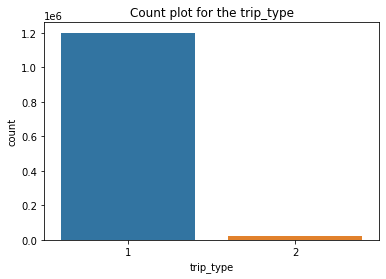

In [17]:
# Plot for the categorical data characterization
for i in catCol:
    sns.countplot(x= data[i]);
    plt.title('Count plot for the '+i)
    plt.show();

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

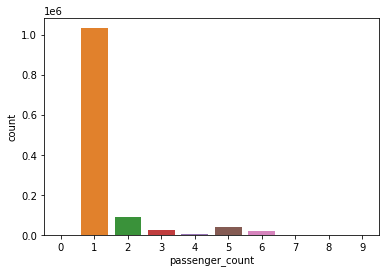

In [18]:
sns.countplot(data['passenger_count'])

In [19]:
data['passenger_count'].value_counts()

1    1033788
2      93550
5      43479
3      24471
6      20530
4       8085
0        173
8         36
7         34
9         12
Name: passenger_count, dtype: int64

In [20]:
data[numCol].describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06
mean,1.362447e+00,2.618179e+00,1.159368e+01,3.629562e-01,4.872578e-01,1.128787e+00,9.456725e-02,2.925184e-01,1.399902e+01
std,1.036924e+00,2.806160e+00,9.793499e+00,3.901575e-01,8.517500e-02,2.216306e+00,8.808537e-01,5.072935e-02,1.112872e+01
min,0.000000e+00,0.000000e+00,-4.990000e+02,-4.500000e+00,-5.000000e-01,-1.056000e+01,-8.540000e+00,-3.000000e-01,-4.990000e+02
25%,1.000000e+00,9.800000e-01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.800000e+00
50%,1.000000e+00,1.700000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01
75%,1.000000e+00,3.200000e+00,1.400000e+01,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.656000e+01
max,9.000000e+00,1.475000e+02,1.007000e+03,4.500000e+00,5.000000e-01,2.507000e+02,2.979800e+02,3.000000e-01,1.008300e+03


In [21]:
data[data['trip_distance'] > 100]

# There are some invalid entry like for 1010408, 1011462 record the trip distance is 101 miles but still 
    # the total fare shown is 0. Assuming that the cab driver would have taken the charge in cash
        # due to the connection issue or any other issue

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
40834,1,2016-12-02 00:44:56,2016-12-02 04:28:57,N,1,95,265,1,128.40,351.5,0.5,0.5,54.50,10.50,0.3,417.80,1,1
192430,1,2016-12-05 15:09:39,2016-12-05 21:49:03,N,1,17,226,1,100.10,340.5,0.0,0.5,85.33,0.00,0.3,426.63,1,1
369503,2,2016-12-09 23:02:33,2016-12-10 01:56:03,N,5,188,265,1,111.91,60.0,0.0,0.0,0.00,0.00,0.0,60.00,2,2
711112,1,2016-12-17 21:18:05,2016-12-18 00:36:24,N,4,61,17,2,147.50,700.0,0.5,0.5,0.00,11.08,0.3,712.38,1,1
902108,1,2016-12-22 18:17:55,2016-12-22 21:31:49,N,1,130,265,1,119.10,309.5,1.0,0.5,0.00,0.00,0.3,311.30,2,1
1010408,1,2016-12-25 12:48:25,2016-12-25 18:47:08,N,5,129,173,1,101.30,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2,2
1011462,2,2016-12-25 13:44:43,2016-12-25 18:32:20,N,5,7,129,2,100.39,5.0,0.0,0.0,0.00,0.00,0.0,5.00,2,2
1157196,2,2016-12-30 16:03:18,2016-12-31 03:34:13,N,2,32,242,1,133.59,52.0,4.5,0.5,0.00,0.00,0.3,57.30,2,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

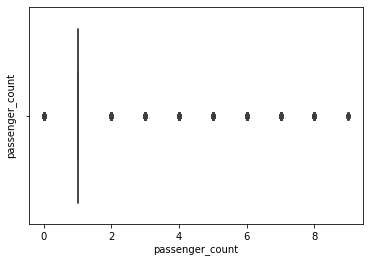

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

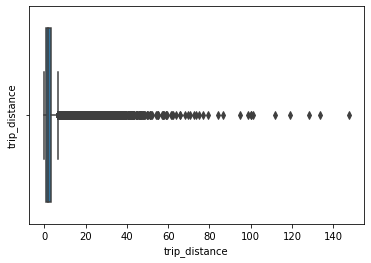

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

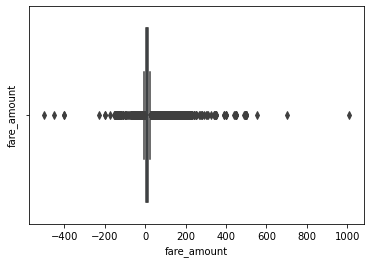

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

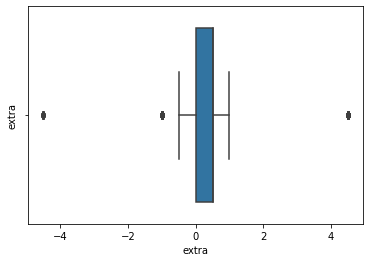

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

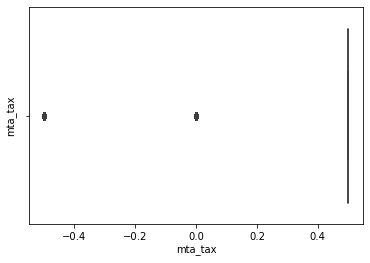

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

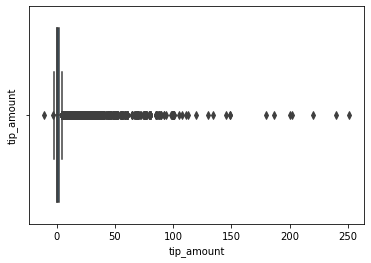

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

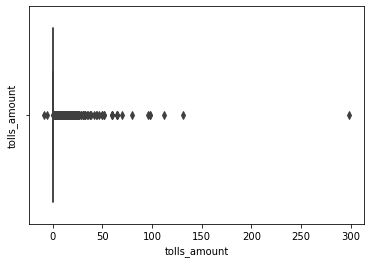

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

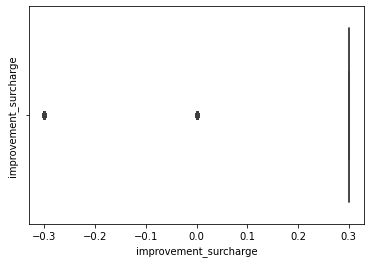

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

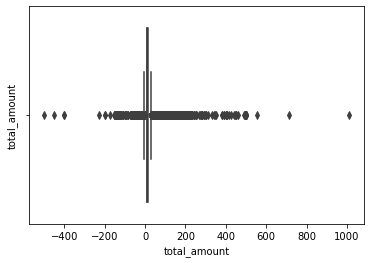

In [22]:
# Box PLot for the outliers, as after the initial analysis it was seen that there were some extreme values
    # and negative values like fare_amount which is not possible to have a negative values.
for i in numCol:
    sns.boxplot(x = data[i])
    plt.ylabel(i)
    plt.show()

In [23]:
data = data[data['total_amount'] > 0]
data = data[data['fare_amount'] > 0]
data = data[data['trip_distance']> 0]
data = data[data['passenger_count'] > 0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

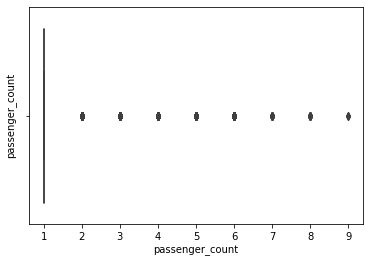

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

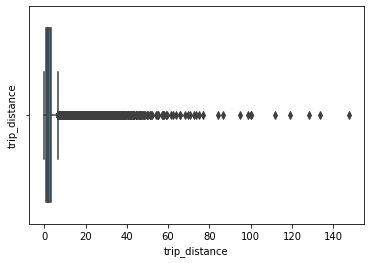

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

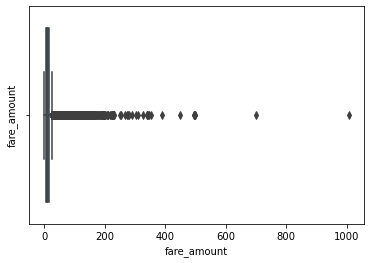

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

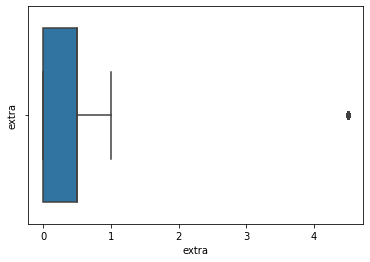

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

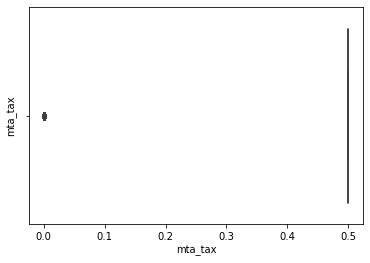

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

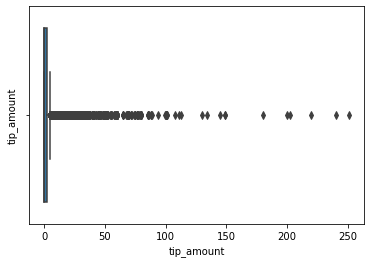

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

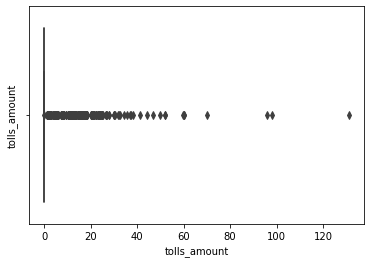

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

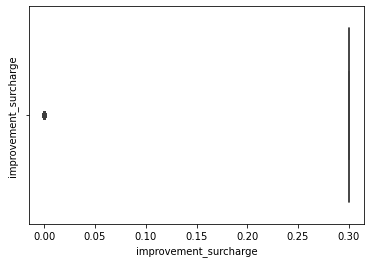

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

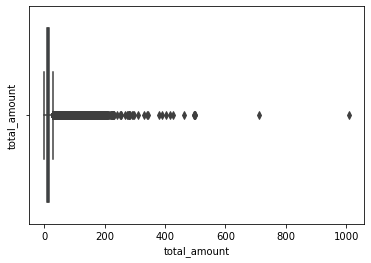

In [24]:
# Box Plot after removing the outlier.
for i in numCol:
    sns.boxplot(x = data[i])
    plt.ylabel(i)
    plt.show()

In [25]:
# 1. Passenger count can be more than 6 as well, as the taxi booked can be like mini van which can accomodate more than
    # 6 passengers so not considering this as outlier
    
# 2. Trip distance can't be conisdered as outlier as there might be chances that the passesngers would have travelled
    # this much distance. Hence these two points need to verified from the business stakeholders or business req.
    
# 3. Assuming Fare amount and Total Amount can't be negative so remove the values below 0. Also, it was seen that 
    # even if the trip_distance has been used but still the fare_amount or Total Amount is 0 so ignoring these
        # values as well. Taking only >0
        
# 4. Considering all these attributes extreme values in the data. As these data might not be outliers and these might be
    # the true values.

# DATA VISUALIZATION

In [26]:
# Univariate Analysis - Already covered univariate analysis while performing the basic analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

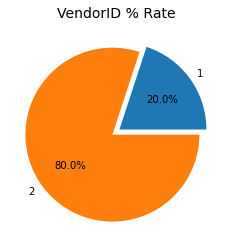

In [27]:
vendorCount = data.groupby('VendorID')['VendorID'].count()

plt.title("VendorID % Rate", fontsize=14);
plt.pie(vendorCount, autopct= '%.1f%%', labels=[1,2], explode=[0.05]*len(data['VendorID'].unique()))
plt.show()

In [28]:
# Number of trips on a particular Date
trips_on_day = pd.DataFrame(np.unique(data["lpep_pickup_datetime"].dt.date, return_counts=True)).T
trips_on_day.columns = ["Date", "Trip_Count"]
trips_on_day.set_index(keys="Date", inplace=True)
trips_on_day.sort_index(inplace=True)
trips_on_day

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Trip_Count
Date,
2016-12-01,38879
2016-12-02,44776
2016-12-03,49433
2016-12-04,39282
2016-12-05,32821
2016-12-06,38577
2016-12-07,35922
2016-12-08,39167
2016-12-09,47522


In [29]:
trips_on_day.sort_values(by = 'Trip_Count', ascending =False)

,Trip_Count
Date,
2016-12-10,51502
2016-12-16,50332
2016-12-03,49433
2016-12-17,47604
2016-12-09,47522
2016-12-31,45955
2016-12-15,45310
2016-12-02,44776
2016-12-23,42506


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

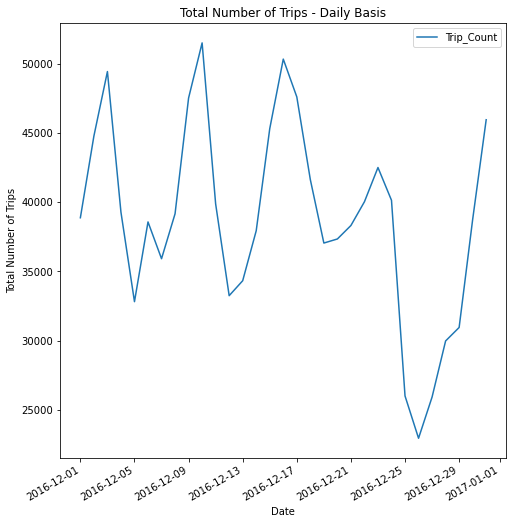

In [30]:
trips_on_day.plot(figsize = (8,8));
plt.ylabel('Total Number of Trips');
plt.title('Total Number of Trips - Daily Basis');
plt.xticks(rotation=30, ha='right');

In [31]:
# Number of trips on a particular Day
trips_on_day = pd.DataFrame(np.unique(data["lpep_pickup_datetime"].dt.day, return_counts=True)).T
trips_on_day.columns = ["Date", "Trip_Count"]
trips_on_day.set_index(keys="Date", inplace=True)
trips_on_day.sort_index(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

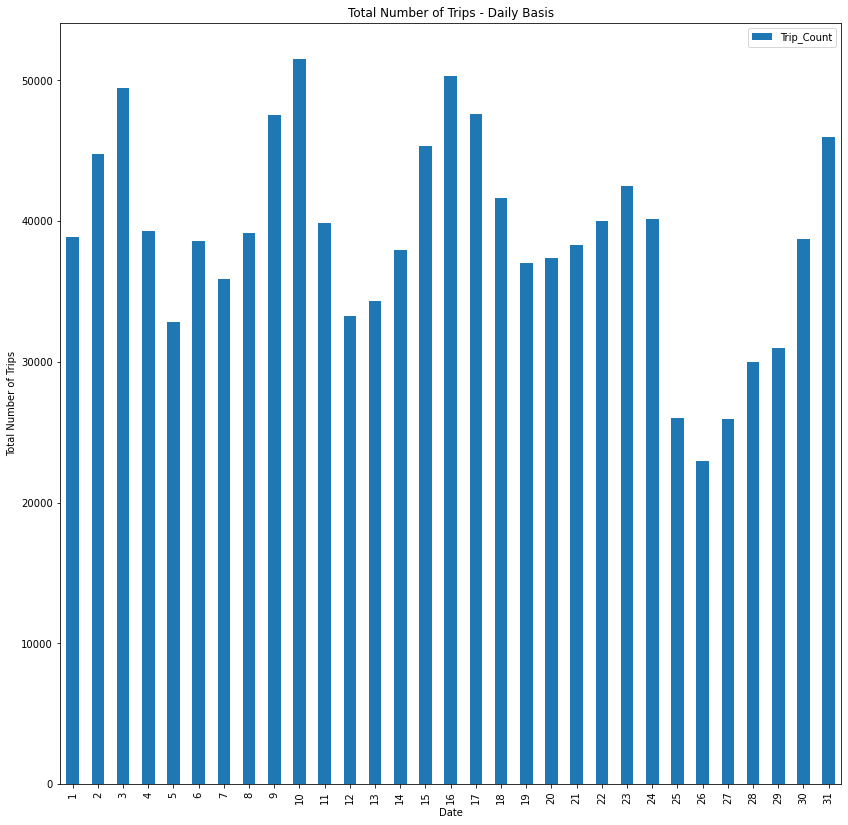

In [32]:
trips_on_day.plot(figsize = (14,14), kind = 'bar');
plt.ylabel('Total Number of Trips');
plt.title('Total Number of Trips - Daily Basis');
plt.xticks(rotation=90);

In [33]:
# Number of trips on a particular Week
trips_on_week = pd.DataFrame(np.unique(data["lpep_pickup_datetime"].dt.week, return_counts=True)).T
trips_on_week.columns = ["Date", "Trip_Count"]
trips_on_week.set_index(keys="Date", inplace=True)
trips_on_week.sort_index(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

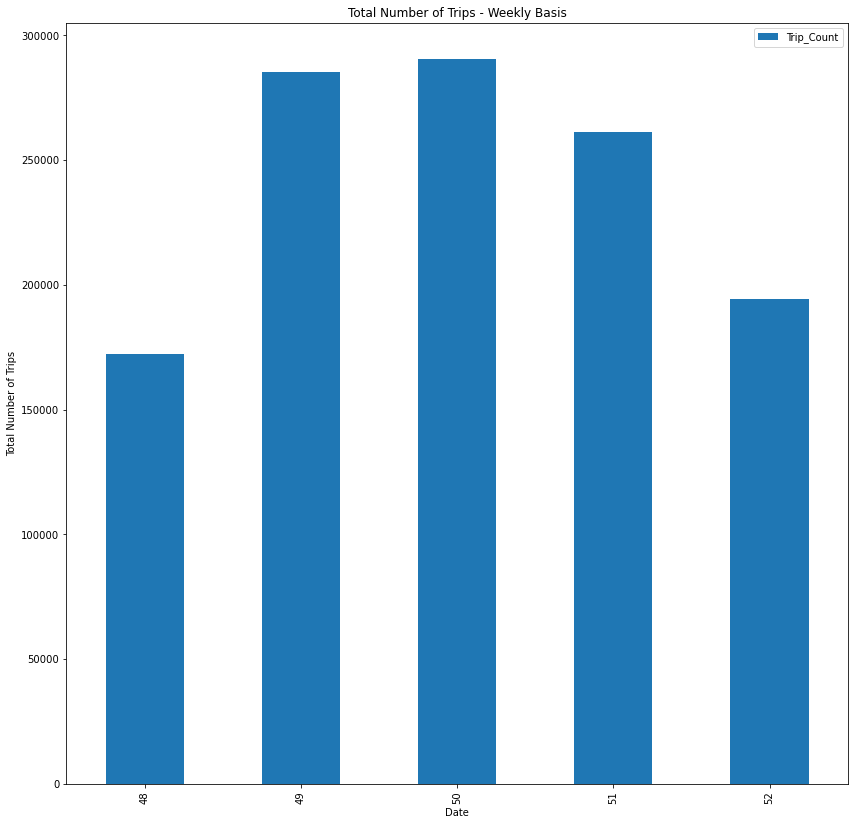

In [34]:
trips_on_week.plot(figsize = (14,14), kind = 'bar');
plt.ylabel('Total Number of Trips');
plt.title('Total Number of Trips - Weekly Basis');
plt.xticks(rotation=90);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

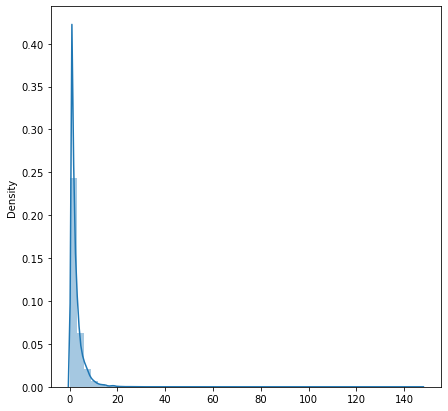

In [35]:
plt.figure(figsize = (7,7));
sns.distplot(x = data['trip_distance'],norm_hist = True, kde = True);

In [36]:
# BIVARIATE ANALYSIS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

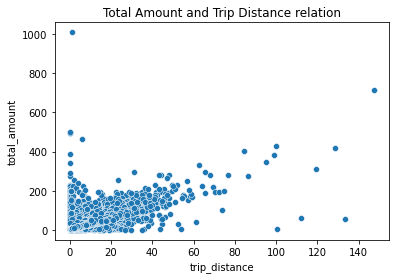

In [37]:
sns.scatterplot(x = 'trip_distance', y = 'total_amount', palette= 'spring',data = data);
plt.title('Total Amount and Trip Distance relation');
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

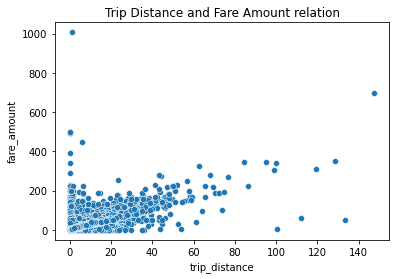

In [38]:
sns.scatterplot(x = 'trip_distance', y = 'fare_amount', palette= 'magma',data = data);
plt.title('Trip Distance and Fare Amount relation');
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

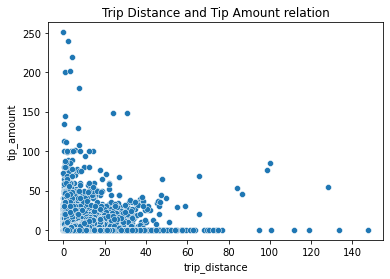

In [39]:
sns.scatterplot(x = 'trip_distance', y = 'tip_amount', palette= 'spring',data = data);
plt.title('Trip Distance and Tip Amount relation');
plt.show();

<IPython.core.display.Javascript object>

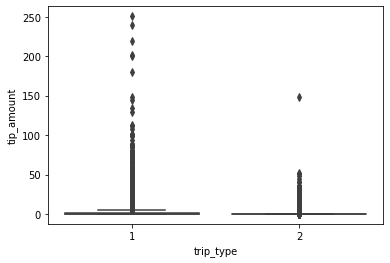

In [40]:
sns.boxplot(y = data['tip_amount'], x = data['trip_type']);

<IPython.core.display.Javascript object>

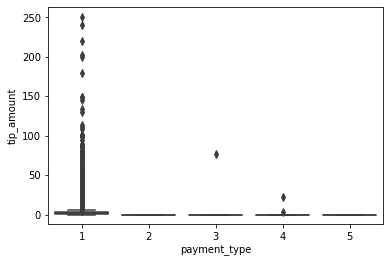

In [41]:
sns.boxplot(y = data['tip_amount'], x = data['payment_type']);

<IPython.core.display.Javascript object>

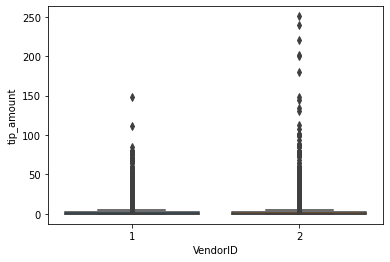

In [42]:
sns.boxplot(y = data['tip_amount'], x = data['VendorID']);

In [43]:
#sns.lineplot(x = 'trip_distance', y = 'tip_amount', palette = 'flare_r',data = data)
#plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

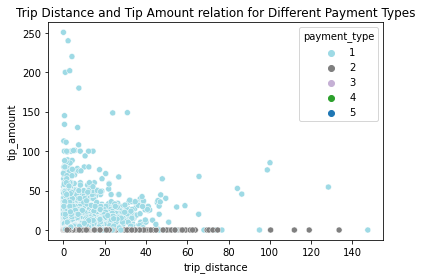

In [44]:
sns.scatterplot(x = 'trip_distance', y = 'tip_amount',hue = 'payment_type', palette= 'tab20_r',data = data);
plt.title('Trip Distance and Tip Amount relation for Different Payment Types');
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

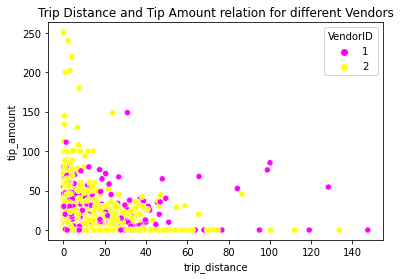

In [45]:
sns.scatterplot(x = 'trip_distance', y = 'tip_amount',hue = 'VendorID', palette= 'spring',data = data);
plt.title('Trip Distance and Tip Amount relation for different Vendors');
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

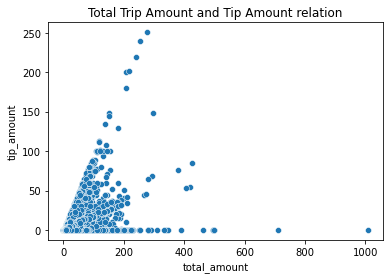

In [46]:
sns.scatterplot(x = 'total_amount', y = 'tip_amount', palette= 'spring',data = data);
plt.title('Total Trip Amount and Tip Amount relation');
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

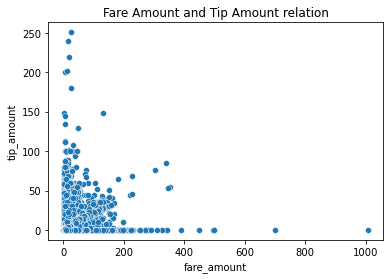

In [47]:
sns.scatterplot(x = 'fare_amount', y = 'tip_amount', palette= 'spring',data = data);
plt.title('Fare Amount and Tip Amount relation');
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

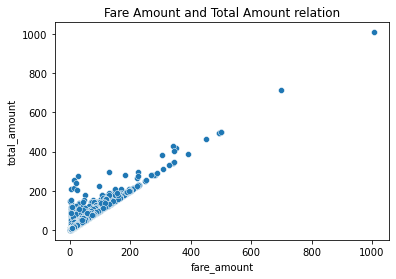

In [48]:
sns.scatterplot(x = 'fare_amount', y = 'total_amount', palette= 'spring',data = data);
plt.title('Fare Amount and Total Amount relation');
plt.show();

In [49]:
# Calculating the duration of the trips in hours
data['total_hours'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds()/3600

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

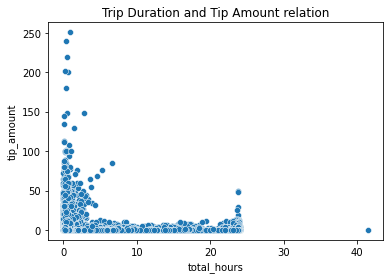

In [50]:
sns.scatterplot(x = 'total_hours', y = 'tip_amount', palette= 'spring',data = data);
plt.title('Trip Duration and Tip Amount relation');
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

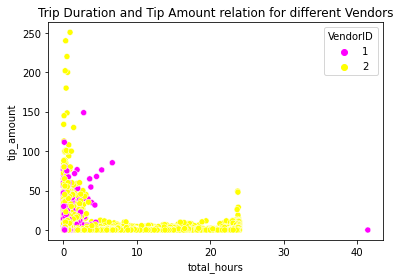

In [51]:
sns.scatterplot(x = 'total_hours', y = 'tip_amount',hue = 'VendorID', palette= 'spring',data = data);
plt.title('Trip Duration and Tip Amount relation for different Vendors');
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

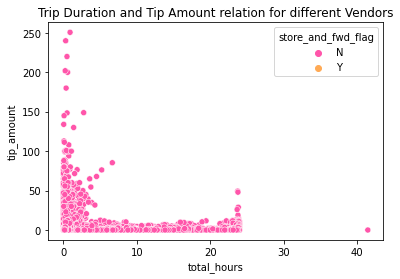

In [52]:
sns.scatterplot(x = 'total_hours', y = 'tip_amount',hue = 'store_and_fwd_flag', palette= 'spring',data = data);
plt.title('Trip Duration and Tip Amount relation for different Vendors');
plt.show();

In [53]:
# Trip distance is 0 but still the total hour utilized, total amount is more than 0.

<IPython.core.display.Javascript object>

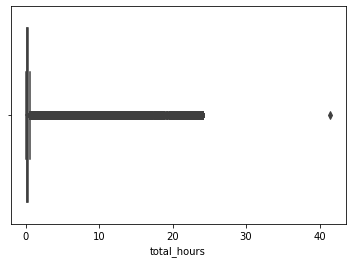

In [54]:
sns.boxplot(data['total_hours']);

In [55]:
max(data['total_hours'])

41.465

In [56]:
hourlyData = data.groupby(data['lpep_pickup_datetime'].dt.hour).agg({'lpep_pickup_datetime':'count','passenger_count':'sum',
                                                                         'trip_distance':'mean','fare_amount':'mean', 
                                                                         'tip_amount':'mean','total_amount':'mean','total_hours':'mean'}) \
                                                                .rename(columns={'lpep_pickup_datetime':'Total_trips',
                                                                                 'passenger_count':'Total_Passenger',
                                                                                'trip_distance':'avg_trip_distance',
                                                                                'fare_amount': 'avg_fare_amount',
                                                                                'tip_amount':'avg_tip_amount',
                                                                                 'total_amount':'avg_total_amount',
                                                                                'total_hours': 'avg_total_hours'})

hourlyData.index.names = ['Hours']
hourlyData

,Total_trips,Total_Passenger,avg_trip_distance,avg_fare_amount,avg_tip_amount,avg_total_amount,avg_total_hours
Hours,,,,,,,
0,48040,66773,2.844998,11.403809,1.195773,13.981791,0.361629
1,37389,52443,2.842420,11.332307,1.152076,13.865407,0.362755
2,27305,39119,2.935234,11.484409,1.140848,13.992849,0.377051
3,21258,30445,3.079973,11.909095,1.143214,14.456122,0.385047
4,17457,24779,3.357392,12.760841,1.114836,15.338643,0.401613
5,11105,15552,4.066593,14.559785,1.424996,17.615790,0.324697
6,14867,19989,3.958887,14.538248,1.500952,17.242181,0.348299
7,30341,40178,2.981629,12.509435,1.265342,14.844697,0.376485
8,44983,59274,2.700646,12.037715,1.297276,14.350776,0.334185


In [57]:
hourlyDataDrp = data.groupby(data['lpep_dropoff_datetime'].dt.hour).agg({'lpep_dropoff_datetime':'count','passenger_count':'sum',
                                                                         'trip_distance':'mean','fare_amount':'mean', 
                                                                         'tip_amount':'mean','total_amount':'mean','total_hours':'mean'}) \
                                                                .rename(columns={'lpep_dropoff_datetime':'Total_trips',
                                                                                 'passenger_count':'Total_Passenger',
                                                                                'trip_distance':'avg_trip_distance',
                                                                                'fare_amount': 'avg_fare_amount',
                                                                                'tip_amount':'avg_tip_amount',
                                                                                 'total_amount':'avg_total_amount',
                                                                                'total_hours': 'avg_total_hours'})

hourlyDataDrp.index.names = ['Hours']
hourlyDataDrp

,Total_trips,Total_Passenger,avg_trip_distance,avg_fare_amount,avg_tip_amount,avg_total_amount,avg_total_hours
Hours,,,,,,,
0,51851,72140,2.888587,11.631011,1.189195,14.194299,0.654103
1,39409,55106,2.965503,11.726987,1.202946,14.319358,0.323456
2,28849,41253,2.994754,11.708897,1.176069,14.260456,0.340406
3,21586,31042,3.103957,11.976073,1.167147,14.533913,0.347891
4,18745,26690,3.341210,12.745385,1.113917,15.295485,0.316850
5,11521,16233,4.027476,14.484408,1.379418,17.476387,0.309846
6,13100,17538,3.860213,14.091131,1.427979,16.752214,0.379412
7,26002,34499,2.960948,12.080915,1.214455,14.377316,0.350478
8,42380,56070,2.588338,11.537454,1.206362,13.754845,0.295619


In [58]:
hourlyData.describe()

,Total_trips,Total_Passenger,avg_trip_distance,avg_fare_amount,avg_tip_amount,avg_total_amount,avg_total_hours
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,50172.166667,68376.208333,2.811530,11.906343,1.160385,14.336764,0.349644
std,22297.220565,30600.725249,0.436602,0.962873,0.116909,1.070256,0.022682
min,11105.000000,15552.000000,2.349452,10.684695,1.039632,13.128225,0.318450
25%,35627.000000,49376.750000,2.571892,11.314305,1.092678,13.857118,0.332334
50%,47505.000000,64123.000000,2.687740,11.841229,1.128084,13.987320,0.344903
75%,67339.250000,92830.250000,2.867557,12.043120,1.163000,14.468845,0.364256
max,85837.000000,118394.000000,4.066593,14.559785,1.500952,17.615790,0.401613


In [59]:
hourlyDataDrp.describe()

,Total_trips,Total_Passenger,avg_trip_distance,avg_fare_amount,avg_tip_amount,avg_total_amount,avg_total_hours
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,50172.166667,68376.208333,2.806653,11.882435,1.156414,14.304879,0.345318
std,22561.100950,30970.420985,0.425324,0.840338,0.103572,0.969734,0.068697
min,11521.000000,16233.000000,2.400625,10.887427,1.003176,13.391682,0.295619
25%,36769.000000,51642.750000,2.543998,11.534901,1.093344,13.743212,0.318587
50%,48256.500000,63791.000000,2.675395,11.717942,1.142411,14.171943,0.327865
75%,67904.750000,92548.500000,2.962087,11.974006,1.202961,14.349981,0.348093
max,88366.000000,121544.000000,4.027476,14.484408,1.427979,17.476387,0.654103


In [60]:
hourlyData.describe()-hourlyDataDrp.describe()

,Total_trips,Total_Passenger,avg_trip_distance,avg_fare_amount,avg_tip_amount,avg_total_amount,avg_total_hours
count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,0.000000,0.000000,0.004877,0.023907,0.003971,0.031884,0.004326
std,-263.880385,-369.695737,0.011278,0.122535,0.013337,0.100523,-0.046015
min,-416.000000,-681.000000,-0.051173,-0.202732,0.036455,-0.263456,0.022832
25%,-1142.000000,-2266.000000,0.027894,-0.220596,-0.000666,0.113906,0.013747
50%,-751.500000,332.000000,0.012345,0.123288,-0.014327,-0.184623,0.017038
75%,-565.500000,281.750000,-0.094530,0.069113,-0.039961,0.118864,0.016163
max,-2529.000000,-3150.000000,0.039118,0.075377,0.072973,0.139403,-0.252490


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

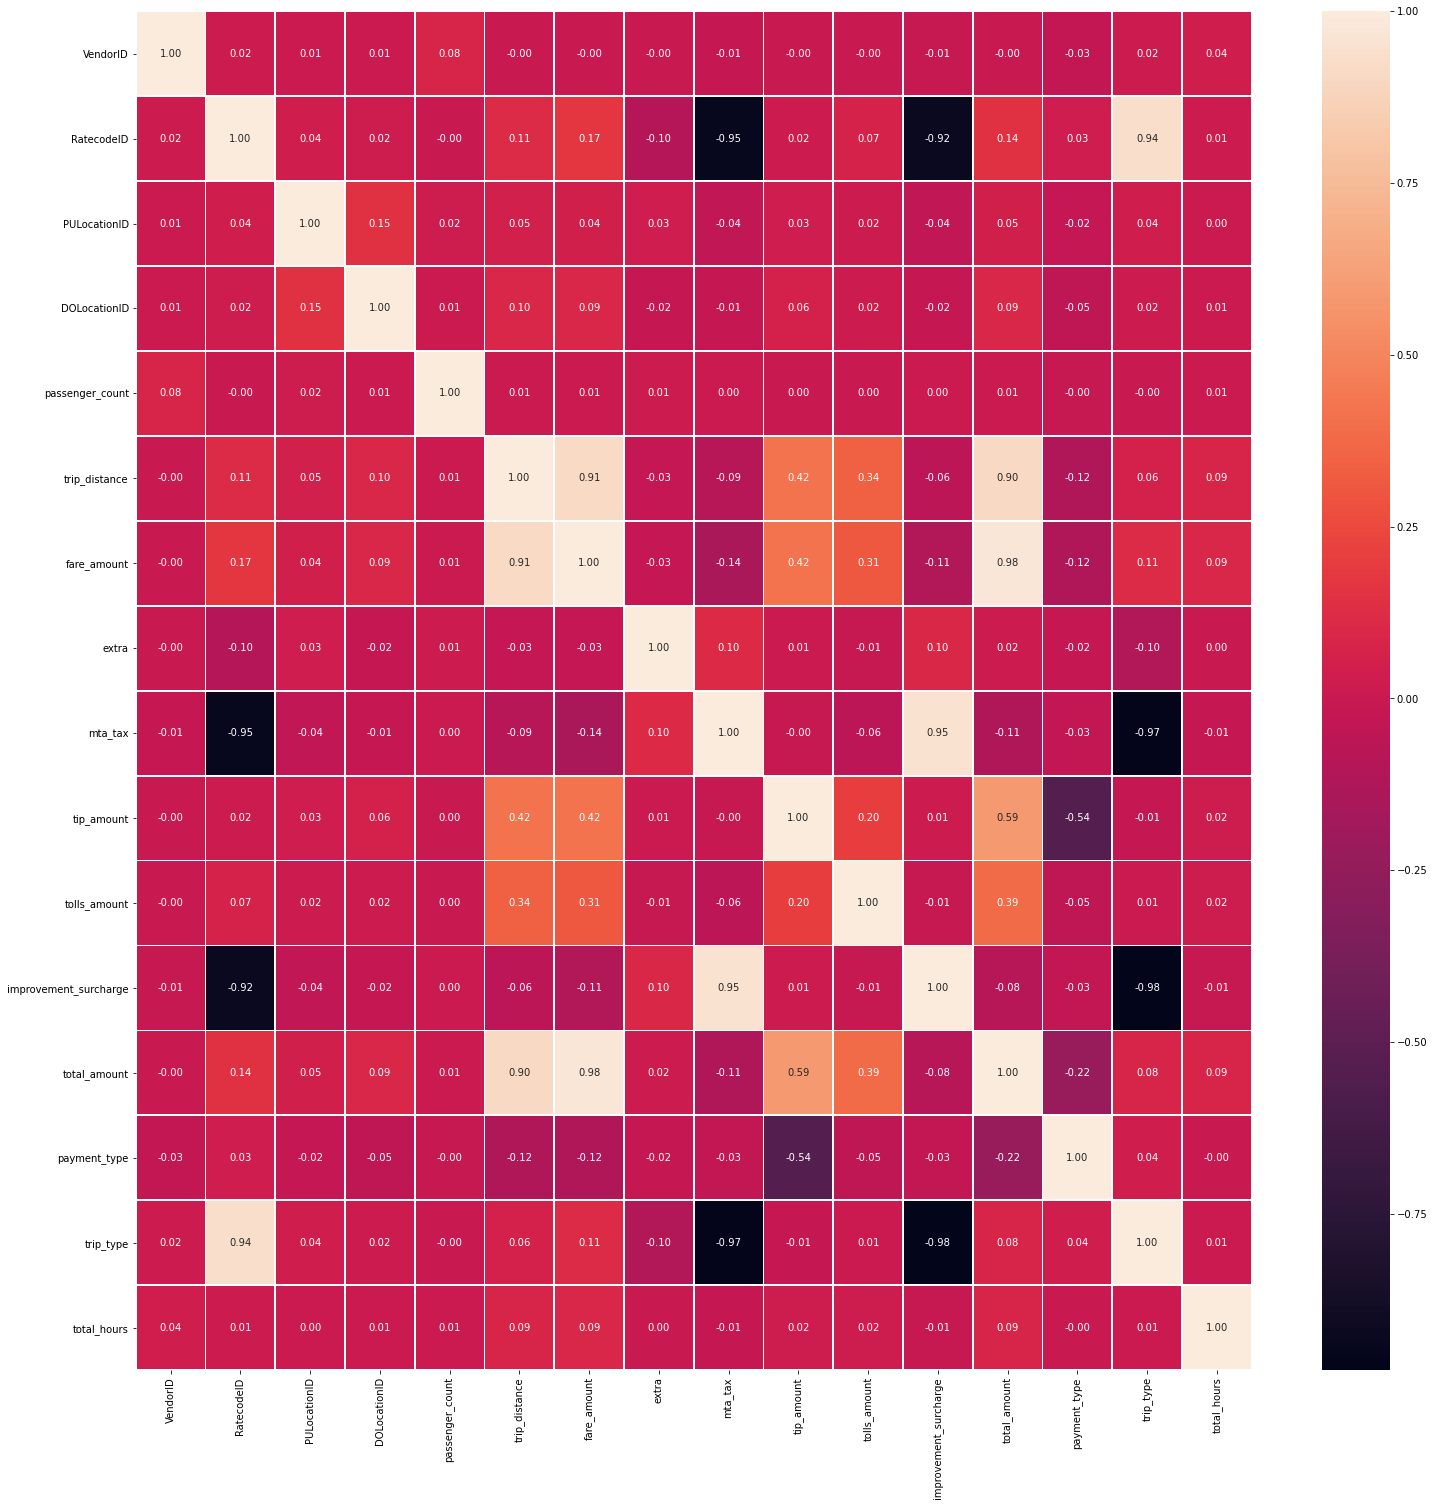

In [61]:
# plotting the corelation among the variables
plt.figure(figsize=(25,25));
sns.heatmap(data.corr(), annot=True, linewidths=0.8, fmt = '0.2f');

In [62]:
# Model Building

In [63]:
data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'total_hours'],
      dtype='object')

In [64]:
for i in catCol:
    print(data[i].value_counts())

N    1202166
Y       1966
Name: store_and_fwd_flag, dtype: int64
2    963815
1    240317
Name: VendorID, dtype: int64
1    1184432
5      15568
2       2717
3        734
4        670
6         11
Name: RatecodeID, dtype: int64
74     70694
41     68713
7      61640
75     61550
82     57355
       ...  
233        1
27         1
239        1
234        1
164        1
Name: PULocationID, Length: 239, dtype: int64
42     40396
74     40155
7      37706
129    36612
41     36556
       ...  
176        5
204        4
44         2
110        1
99         1
Name: DOLocationID, Length: 260, dtype: int64
2    623910
1    574787
3      3133
4      2246
5        56
Name: payment_type, dtype: int64
1    1188474
2      15658
Name: trip_type, dtype: int64


In [65]:
df1 = data.copy()

In [66]:
data = df1.copy()

In [67]:
# Model 1

In [68]:
rem = ['PULocationID','DOLocationID']
catCol = list(set(catCol) - set(rem))
data.drop(['PULocationID','DOLocationID','lpep_pickup_datetime','lpep_dropoff_datetime'], axis = 1, inplace= True)

In [69]:
#Dummies Encoding or the One hot Encoding for the independent variables
df = pd.get_dummies(data = data, columns = catCol,drop_first=True)

<IPython.core.display.Javascript object>

In [70]:
# Dividing the data to Independent and Dependent Variable

X = df.drop('tip_amount', axis=1)
y = df['tip_amount']

In [71]:
# Split the Data - Train Test Split

from sklearn.model_selection import train_test_split

# 30% of the data will be used as test and remaining 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Multiple Linear Regression

lm = LinearRegression()

<IPython.core.display.Javascript object>

In [73]:
model1 = lm.fit(X_train, y_train)

In [74]:
y_pred = model1.predict(X_test)

In [75]:
model1.intercept_

0.05013698087825835

In [76]:
model1.coef_

array([-6.55913183e-04,  2.49386529e-03, -9.66928220e-01, -9.42757203e-01,
       -9.90944106e-01, -9.65000383e-01, -9.81303970e-01,  9.66411350e-01,
       -4.30051322e-05, -6.99496511e-03, -4.44208041e-02, -4.23105304e-02,
       -4.16231607e-02,  9.55875370e-04, -2.19931243e-02,  1.09396345e-01,
        1.09177917e-01,  6.71530718e-02,  4.39191799e-02, -1.35537576e-02,
       -4.89243668e-02])

In [77]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

0.27953158668967343


In [78]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

0.9826702916919792

In [79]:
adjR2 = 1-(1-r2_score)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))
adjR2

0.9826692842010056

In [80]:
import math
r = math.sqrt(r2_score)
r

0.9912972771535182

In [81]:
# Corelation Test

In [82]:
from numpy import cov

covariance = cov(data['total_amount'], data['tip_amount'])
print(covariance)

[[108.97738199  13.11709968]
 [ 13.11709968   4.56180915]]


In [83]:
from scipy.stats import pearsonr


pcor,_ = pearsonr(data['total_amount'], data['tip_amount'])
print('Pearsons correlation: %.3f' % pcor)

Pearsons correlation: 0.588


In [84]:
# calculate the spearmans's correlation between two variables
from scipy.stats import spearmanr

corr, _ = spearmanr(data['total_amount'], data['tip_amount'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.429


In [85]:
# Model 2

In [86]:
df2 = df.copy()

In [87]:
df2.drop(['total_amount'], axis = 1, inplace= True)

In [88]:
# Dividing the data to Independent and Dependent Variable

X = df2.drop('tip_amount', axis=1)
y = df2['tip_amount']

In [89]:
# 30% of the data will be used as test and remaining 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
model2 = lm.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [91]:
i, c = model2.intercept_,model2.coef_

In [92]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

1.576598984676948


In [93]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

0.448720353407116

In [94]:
adjR2 = 1-(1-r2_score)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))
adjR2

0.4486898301153406

In [95]:
import math
r = math.sqrt(r2_score)
r

0.6698659219628328

In [96]:
# MODEL 3

df3 = df.copy()

In [97]:
#df3['other_amount'] = df3['extra']+df3['mta_tax']+df3['tolls_amount']+df3['improvement_surcharge']

In [98]:
df3.columns

Index(['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'total_hours', 'payment_type_2', 'payment_type_3', 'payment_type_4',
       'payment_type_5', 'store_and_fwd_flag_Y', 'trip_type_2', 'RatecodeID_2',
       'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_6',
       'VendorID_2'],
      dtype='object')

In [99]:
# Dividing the data to Independent and Dependent Variable

X = df3.drop(['tip_amount','total_hours','fare_amount', 'extra', 'mta_tax','tolls_amount', 'improvement_surcharge'], axis=1)
y = df3['tip_amount']

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204132 entries, 0 to 1224157
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   passenger_count       1204132 non-null  int64  
 1   trip_distance         1204132 non-null  float64
 2   total_amount          1204132 non-null  float64
 3   payment_type_2        1204132 non-null  uint8  
 4   payment_type_3        1204132 non-null  uint8  
 5   payment_type_4        1204132 non-null  uint8  
 6   payment_type_5        1204132 non-null  uint8  
 7   store_and_fwd_flag_Y  1204132 non-null  uint8  
 8   trip_type_2           1204132 non-null  uint8  
 9   RatecodeID_2          1204132 non-null  uint8  
 10  RatecodeID_3          1204132 non-null  uint8  
 11  RatecodeID_4          1204132 non-null  uint8  
 12  RatecodeID_5          1204132 non-null  uint8  
 13  RatecodeID_6          1204132 non-null  uint8  
 14  VendorID_2            1204132 non-

In [101]:
# 30% of the data will be used as test and remaining 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
model3 = lm.fit(X_train, y_train)
y_pred = model3.predict(X_test)

i, c = model3.intercept_,model3.coef_
c

array([-2.28780329e-03, -3.74169939e-01,  1.97610934e-01, -1.67100414e+00,
       -1.51167613e+00, -1.66277891e+00, -1.92049293e+00, -1.09710649e-01,
        1.63996537e-01, -5.64204289e-01, -1.43589423e+00, -2.39610055e+00,
       -1.12865424e+00,  1.39513244e+00, -2.33977051e-02])

In [103]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

1.4265036493234173


In [104]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

0.5486896977589824

In [105]:
adjR2 = 1-(1-r2_score)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))
adjR2

0.5486709568820373

In [106]:
import math
r = math.sqrt(r2_score)
r

0.740735916341973

In [107]:
# MODEL 3 B

df4 = df.copy()
df4.drop(['total_hours','fare_amount', 'extra', 'mta_tax','tolls_amount', 'improvement_surcharge'], axis=1, inplace= True)

In [108]:
# Hadling Outliers
df4.describe()

,passenger_count,trip_distance,tip_amount,total_amount,payment_type_2,payment_type_3,payment_type_4,payment_type_5,store_and_fwd_flag_Y,trip_type_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,VendorID_2
count,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06,1.204132e+06
mean,1.362831e+00,2.652417e+00,1.130370e+00,1.403111e+01,5.181409e-01,2.601874e-03,1.865244e-03,4.650653e-05,1.632711e-03,1.300356e-02,2.256397e-03,6.095677e-04,5.564174e-04,1.292882e-02,9.135211e-06,8.004230e-01
std,1.038347e+00,2.798905e+00,2.135839e+00,1.043922e+01,4.996710e-01,5.094219e-02,4.314819e-02,6.819414e-03,4.037384e-02,1.132893e-01,4.744795e-02,2.468191e-02,2.358195e-02,1.129676e-01,3.022439e-03,3.996825e-01
min,1.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00,7.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.000000e+00,1.710000e+00,0.000000e+00,1.080000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.000000e+00,3.230000e+00,1.860000e+00,1.656000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,9.000000e+00,1.475000e+02,2.507000e+02,1.008300e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [109]:
df.shape

(1204132, 22)

<IPython.core.display.Javascript object>

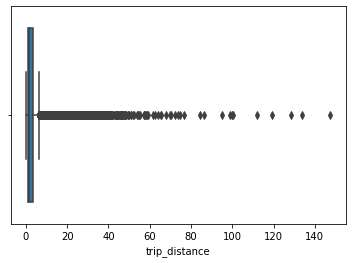

In [110]:
sns.boxplot(df4['trip_distance']);

<IPython.core.display.Javascript object>

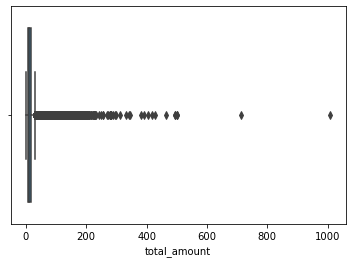

In [111]:
sns.boxplot(df4['total_amount']);

In [112]:
q1 = df4['trip_distance'].quantile(0.25)
q3 = df['trip_distance'].quantile(0.75)
iqr = q3-q1


upper_fence = q3+1.5*iqr
upper_fence

6.574999999999999

In [113]:
df4= df4[df4['trip_distance'] <= 6.57]

In [114]:
q1 = df4['total_amount'].quantile(0.25)
q3 = df['total_amount'].quantile(0.75)
iqr = q3-q1


upper_fence = q3+1.5*iqr
upper_fence

29.699999999999996

In [115]:
df4= df4[df4['total_amount'] <= 29.7]

<IPython.core.display.Javascript object>

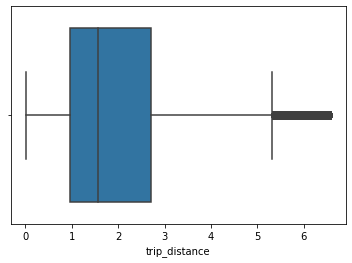

In [116]:
sns.boxplot(df4['trip_distance']);

<IPython.core.display.Javascript object>

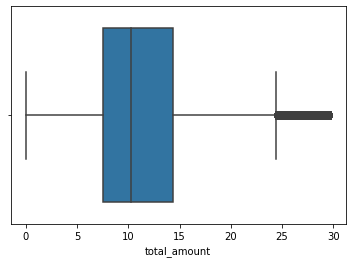

In [117]:
sns.boxplot(df4['total_amount']);

In [118]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095007 entries, 0 to 1224157
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   passenger_count       1095007 non-null  int64  
 1   trip_distance         1095007 non-null  float64
 2   tip_amount            1095007 non-null  float64
 3   total_amount          1095007 non-null  float64
 4   payment_type_2        1095007 non-null  uint8  
 5   payment_type_3        1095007 non-null  uint8  
 6   payment_type_4        1095007 non-null  uint8  
 7   payment_type_5        1095007 non-null  uint8  
 8   store_and_fwd_flag_Y  1095007 non-null  uint8  
 9   trip_type_2           1095007 non-null  uint8  
 10  RatecodeID_2          1095007 non-null  uint8  
 11  RatecodeID_3          1095007 non-null  uint8  
 12  RatecodeID_4          1095007 non-null  uint8  
 13  RatecodeID_5          1095007 non-null  uint8  
 14  RatecodeID_6          1095007 non-

In [119]:
# Dividing the data to Independent and Dependent Variable

X = df4.drop(['tip_amount'], axis=1)
y = df4['tip_amount']

In [120]:
# 30% of the data will be used as test and remaining 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
model3b = lm.fit(X_train, y_train)
y_pred = model3b.predict(X_test)

i, c = model3b.intercept_,model3.coef_
c

array([ 2.38759208e-03, -4.68960640e-01,  2.02866046e-01, -1.42823634e+00,
       -1.16168035e+00, -1.34600805e+00, -1.19659058e+00, -4.78002691e-02,
        1.94531112e-02,  6.66133815e-15, -2.90814149e+00, -7.60572519e-01,
       -3.90420915e-01,  1.41474266e+00, -1.80261725e-02])

In [122]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

0.7238229060768399


In [123]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

0.683221755047511

In [124]:
adjR2 = 1-(1-r2_score)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))
adjR2

0.6832072897150191

In [125]:
import math
r = math.sqrt(r2_score)
r

0.8265722926928479